In [ ]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import pandas as pd
import sys
sys.path.append("../")
import gyrochrones as gyr

pl.rc('xtick', labelsize=20)
pl.rc('ytick', labelsize=20)
pl.rc('axes', labelsize=25)
pl.rc('axes', titlesize=30)
pl.rc('legend', handlelength=3)
pl.rc('legend', fontsize=20)

%matplotlib inline

In [2]:
df = pd.read_hdf('../../output/good.h5')

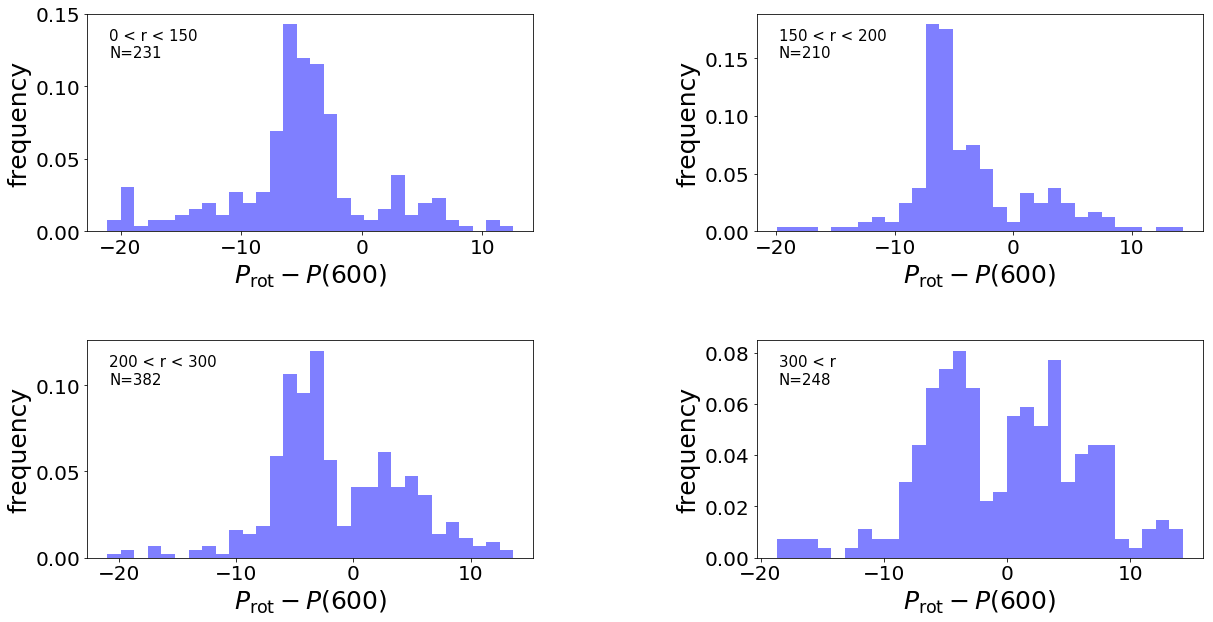

In [3]:
dist = np.array([0, 150, 200, 300, 1000000])
gyr_age = 600
gyrochrone = gyr.Gordon2019(df['B_V'])
finite_age_mask = np.isfinite(gyrochrone)
color_mask = (df['B_V'] > 1.2) & (df['B_V'] < 1.4)
fig, axs = pl.subplots(2, 2, figsize=(20, 10))
axs = np.concatenate(axs)
pl.subplots_adjust(wspace=0.5, hspace=0.5)
#xs = np.concatenate(axs)
for i in range(1, len(dist)):
    cut = (df['r_est'] > dist[i-1]) & (df['r_est'] < dist[i])
    mask = finite_age_mask & cut & color_mask
    perdiff = np.exp(df['logperiod_mean'][mask]) - gyrochrone[mask]
    if i == len(dist)-1:
        axs[i-1].annotate("{0} < r \nN={1}".format(dist[i-1], np.sum(mask)), 
                    xy=(0.05, 0.8), xycoords='axes fraction', fontsize=15)
    else:
        axs[i-1].annotate("{0} < r < {1}\nN={2}".format(dist[i-1], dist[i], np.sum(mask)), 
                    xy=(0.05, 0.8), xycoords='axes fraction', fontsize=15)
    axs[i-1].hist(perdiff, color='b', density=True, bins=30, alpha=0.5)
    axs[i-1].set_xlabel(r'$P_\mathrm{{rot}} - P({0})$'.format(gyr_age))
    axs[i-1].set_ylabel('frequency')
pl.savefig("distance.pdf")

In [ ]:
dist = np.array([0, 150, 200, 300, 1000000])
gyr_age = 600
gyrochrone = gyr.MM09e3(df['B_V'], gyr_age)
finite_age_mask = np.isfinite(gyrochrone)
noclusters = (df['k2_campaign_str'] != b'16') & (df['k2_campaign_str'] != b'5') & (df['k2_campaign_str'] != b'4')
fig, axs = pl.subplots(2, 2, figsize=(20, 10))
axs = np.concatenate(axs)
pl.subplots_adjust(wspace=0.5, hspace=0.5)
#xs = np.concatenate(axs)
for i in range(1, len(dist)):
    cut = (df['r_est'] > dist[i-1]) & (df['r_est'] < dist[i])
    mask = finite_age_mask & cut & noclusters & color_mask
    perdiff = np.exp(df['logperiod_mean'][mask]) - gyrochrone[mask]
    if i == len(dist)-1:
        axs[i-1].annotate("{0} < r \nN={1}".format(dist[i-1], np.sum(mask)), 
                    xy=(0.05, 0.8), xycoords='axes fraction', fontsize=15)
    else:
        axs[i-1].annotate("{0} < r < {1}\nN={2}".format(dist[i-1], dist[i], np.sum(mask)), 
                    xy=(0.05, 0.8), xycoords='axes fraction', fontsize=15)
    axs[i-1].hist(perdiff, color='b', density=True, bins=30, alpha=0.5)
    axs[i-1].set_xlabel(r'$P_\mathrm{{rot}} - P({0})$'.format(gyr_age))
    axs[i-1].set_ylabel('frequency')
finite_age_mask = np.isfinite(gyrochrone)
pl.savefig("distance_noclusters.pdf")

In [ ]:
fig, axs = pl.subplots(2, 2, figsize=(40, 20))
axs = np.concatenate(axs)
pl.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(1, len(dist)):
    cut = (df['r_est'] > dist[i-1]) & (df['r_est'] < dist[i])
    mask = finite_age_mask & cut 
    if i == len(dist)-1:
        axs[i-1].annotate("{0} < r \nN={1}".format(dist[i-1], np.sum(mask)), 
                    xy=(0.05, 0.8), xycoords='axes fraction', fontsize=15)
    else:
        axs[i-1].annotate("{0} < r < {1}\nN={2}".format(dist[i-1], dist[i], np.sum(mask)), 
                    xy=(0.05, 0.8), xycoords='axes fraction', fontsize=15)
    axs[i-1].semilogy(df['B_V'][mask], np.exp(df['logperiod_mean'][mask]), 'k.')
    axs[i-1].semilogy(df['B_V'][mask], gyr.MM09e3(df['B_V'][mask], 600), 'b.')
    axs[i-1].semilogy(df['B_V'][mask & color_mask], np.exp(df['logperiod_mean'][mask & color_mask]), 'r.')
    axs[i-1].set_xlim(0.3, 2.0)
    axs[i-1].set_ylim(1, 35)
    #axs[i-1].set_xlabel(r'$P_\mathrm{{rot}} - P({0})$'.format(gyr_age))
    #axs[i-1].set_ylabel('frequency')
#finite_age_mask = np.isfinite(gyrochrone)
#pl.savefig("distance_noclusters.pdf")

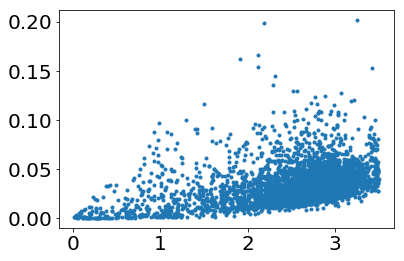

In [10]:
pl.plot(df['logperiod_mean'], df['logperiod_sd'], '.')

In [5]:
for k in df.keys():
    print(k)

solution_id
designation
source_id
random_index
gaia_ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
astrometric_weight_al
astrometric_pseudo_colour
astrometric_pseudo_colour_error
mean_varpi_factor_al
astrometric_matched_observations
visibility_periods_used
astrometric_sigma5d_max
frame_rotator_object_type
matched_observations
duplicated_source
phot_g_n_obs
phot_g_mean_flux
phot_g_mean_flux_error
phot_g_mean_flux_over_error
phot_g_mean_mag
phot_bp_n_obs
phot_bp_mean_flux
phot_bp_mean_flux_error
phot_bp_mean_flux_over_error
phot_bp_me